# Imports and constants

In [117]:
%load_ext autoreload
%autoreload 2

import glob
import os

import pandas as pd
from tqdm import tqdm
from infernal import InfernalParser

from dammit.fileio.base import EmptyFile
import predictorthologs_utils as po

pd.options.display.max_rows = 500

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys

In [4]:
sys.path

['/home/olga/code/tabula-microcebus--olgabot/rerun-utar-jan2021/notebooks',
 '/home/olga/anaconda/envs/tabula-microcebus-jan2021/lib/python37.zip',
 '/home/olga/anaconda/envs/tabula-microcebus-jan2021/lib/python3.7',
 '/home/olga/anaconda/envs/tabula-microcebus-jan2021/lib/python3.7/lib-dynload',
 '',
 '/home/olga/anaconda/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages',
 '/home/olga/anaconda/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/IPython/extensions',
 '/home/olga/.ipython']

## `def describe`

In [5]:
def describe(df, random=False):
    print(df.shape)
    print("--- First 5 entries ---")
    display(df.head())
    if random:
        print('--- Random subset ---')
        display(df.sample(5))

## predictorthologs output dir

In [6]:
predictorthologs_outdir = '/home/olga/data_sm/tabula-microcebus/analyses/predictorthologs/utar-rerun-2020-05-22-rmdup-jan2021'

# Read data

## Utar dataframe

In [48]:
utar_df = pd.read_csv('/home/olga/googledrive/.shared/MLCAuTARs.csv')
utar_df['utar_id'] = utar_df['fasta peak'].str.replace(':', '__').str.lower()
utar_df.columns = utar_df.columns.str.replace(' ', "_")
print(utar_df.shape)
utar_df.head()

(11408, 12)


,sample,uTAR,fasta,fasta_peak,peak_blast_result,cell_type,p_value,avg._logFC,%_expression_in_cell_type,%_expression_in_other_cells,p_value_adj.,utar_id
0,Antoine_Bladder_10X,NC-033671.1-80333049-80333549---18-0,NC_033671.1:80333049-80333549,NC_033671.1:80333248-80333394,Apteryx australis mantelli genome assembly Apt...,B cell,0.000000e+00,0.801622,0.4,0.000,0.000000e+00,nc_033671.1__80333248-80333394
1,Antoine_Bladder_10X,NC-033666.1-51567149-51568449-+-84-0,NC_033666.1:51567149-51568449,NC_033666.1:51568050-51568213,undetermined,B cell,9.602478e-60,0.534839,0.4,0.002,2.880340e-54,nc_033666.1__51568050-51568213
2,Antoine_Bladder_10X,NC-033672.1-36774049-36774849---67-0,NC_033672.1:36774049-36774849,NC_033672.1:36774301-36774386,Microcebus murinus chromosome chr16 clone CH25...,B cell,1.143571e-14,0.535301,0.4,0.013,3.430234e-09,nc_033672.1__36774301-36774386
3,Antoine_Bladder_10X,NC-033676.1-58848749-58864449---1010-0,NC_033676.1:58848749-58864449,NC_033676.1:58858363-58860157,PREDICTED: Propithecus coquereli sialophorin (...,B cell,4.116833e-09,0.865333,0.4,0.021,1.234877e-03,nc_033676.1__58858363-58860157
4,Antoine_Bladder_10X,NC-033666.1-87778599-87781699---78-0,NC_033666.1:87778599-87781699,NC_033666.1:87780600-87780897,"Microcebus murinus DNA, homologous to human DS...",B cell,5.894225e-07,0.576084,0.4,0.029,1.768020e-01,nc_033666.1__87780600-87780897


## Read rfam2go

In [8]:
rfam2go = po.get_rfam2go_df()
describe(rfam2go)

/home/olga/code/tabula-microcebus--olgabot/rerun-utar-jan2021/notebooks/predictorthologs_utils.py:32: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rfam2go_original = pd.read_csv(url, header=None, sep=" > ")


(3767, 4)
--- First 5 entries ---


,rfam_id_full,rfam_description,go_description,go_id
rfam_id,,,,
RF00001,Rfam:RF00001,5S_rRNA,GO:structural constituent of ribosome,GO:0003735
RF00001,Rfam:RF00001,5S_rRNA,GO:ribosome,GO:0005840
RF00002,Rfam:RF00002,5_8S_rRNA,GO:structural constituent of ribosome,GO:0003735
RF00002,Rfam:RF00002,5_8S_rRNA,GO:ribosome,GO:0005840
RF00003,Rfam:RF00003,U1,GO:mRNA 5'-splice site recognition,GO:0000395


## Read DIAMOND Blastp output

In [11]:
filenames = glob.iglob(f'{predictorthologs_outdir}/blastp/*.tsv')

dfs = []


# Hard coded number of unique utars
total = 3931
n = 0

for filename in tqdm(filenames, total=total):
    filesize = os.path.getsize(filename)
    if filesize > 0:
        n += 1
        basename = os.path.basename(filename)
        split = basename.split('__molecule-')
        utar_id = split[0]
#         utar_id = split[1]
        
        df = po.read_diamond_blastp_output(filename)
        df['utar_id'] = utar_id
        dfs.append(df)

utar_blastp = pd.concat(dfs)
print(utar_blastp.shape)
utar_blastp.head()

100%|██████████| 3931/3931 [00:26<00:00, 146.98it/s]


(140872, 17)


,read_id,subject_id,percent_identity,e_value,bitscore,subject_title,subject_taxid,subject_species,subject_kingdom,subject_superkingdom,subject_phylum,description_with_status,additional_status,description,description_no_isoform,is_uncharacterized,utar_id
0,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001074510.1,92.9,5.200000e-07,52.0,NP_001074510.1 vacuolar protein sorting-associ...,10090.0,Mus musculus,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
1,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_037397.2,89.3,6.800000e-07,51.6,NP_037397.2 vacuolar protein sorting-associate...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
2,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001095563.1,92.9,1.500000e-06,50.4,NP_001095563.1 vacuolar protein sorting-associ...,9913.0,Bos taurus,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
3,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_001248208.1,100.0,2.300000e-10,63.2,NP_001248208.1 RAS guanyl-releasing protein 2 ...,9544.0,Macaca mulatta,Eukaryota,Chordata,NaN,RAS guanyl-releasing protein 2,NaN,RAS guanyl-releasing protein 2,RAS guanyl-releasing protein 2,False,nc_033664.1__7154186-7154397
4,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_722541.1,100.0,2.300000e-10,63.2,NP_722541.1 RAS guanyl-releasing protein 2 iso...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,RAS guanyl-releasing protein 2 isoform a,NaN,RAS guanyl-releasing protein 2 isoform a,RAS guanyl-releasing protein 2,False,nc_033664.1__7154186-7154397


In [15]:
utar_protein_hits = (
    utar_blastp.groupby("utar_id")
    .apply(lambda x: x.description_no_isoform.value_counts().head())
    .reset_index()
)
utar_protein_hits = utar_protein_hits.rename(columns={'level_1': 'description_no_isoform', 'description_no_isoform': 'n_hits'})
utar_protein_hits = utar_protein_hits.sort_values(['utar_id', 'n_hits'], ascending=False)
utar_protein_hits = utar_protein_hits.set_index(['utar_id', 'description_no_isoform'])
describe(utar_protein_hits)


(12054, 1)
--- First 5 entries ---


n_hits
utar_id                   description_no_isoform                                    
nw_017969113.1__2816-2918 40S ribosomal protein S3                               708
nw_017968608.1__2349-3349 chymotrypsin-like elastase family member 3B pre...     172
                          proproteinase E precursor                              123
                          uncharacterized protein LOC242711 precursor             47
                          chymotrypsin-like elastase family member 3B pre...      31

In [16]:
utar_protein_hits.head(20)

n_hits
utar_id                       description_no_isoform                                    
nw_017969113.1__2816-2918     40S ribosomal protein S3                               708
nw_017968608.1__2349-3349     chymotrypsin-like elastase family member 3B pre...     172
                              proproteinase E precursor                              123
                              uncharacterized protein LOC242711 precursor             47
                              chymotrypsin-like elastase family member 3B pre...      31
nw_017968534.1__64399-67999   40S ribosomal protein S15a                               6
                              olfactory receptor 1F12                                  1
nw_017968534.1__106014-106104 olfactory receptor 1F12                                  1
nw_017968534.1__101899-118099 complement factor I                                     24
                              protein angel homolog 1                                 20
                              zinc finger protein 28                                  11
                              olfactory receptor 1F12                                 10
                              tRNA-splicing endonuclease subunit Sen2                  7
nw_017968525.1__627456-627678 cytochrome P450 3A43                                     2
                              protein angel homolog 1                                  2
                              signal-transducing adaptor protein 2                     1
                              UPF0235 protein C15orf40                                 1
nw_017968525.1__374219-375249 protein angel homolog 1                                 26
                              LIM and calponin homology domains-containing pr...      21
                              cytochrome P450 3A43                                    12

## Infernal results

In [17]:
infernal_results_folder = os.path.join(predictorthologs_outdir, 'infernal')

In [18]:

dfs = []

for filename in tqdm(glob.glob(f'{infernal_results_folder}/*.txt')):
    try:
        df = pd.concat(InfernalParser(filename))
        basename = os.path.basename(filename)
        region_id = basename.split('__molecule-')[0]
        df['utar_id'] = region_id.lower()
        dfs.append(df)
    except EmptyFile:
        continue

infernal_results_original = pd.concat(dfs)
print(infernal_results_original.shape)
infernal_results_original.head()

100%|██████████| 3933/3933 [00:05<00:00, 689.72it/s]


(8859, 28)


,idx,target_name,target_accession,query_name,query_accession,clan_name,mdl,mdl_from,mdl_to,seq_from,...,inc,olp,anyidx,afrct1,afrct2,winidx,wfrct1,wfrct2,description,utar_id
0,1,7SK,RF00100,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,<NA>,CL00013,cm,50,128,0,...,!,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7SK RNA,nc_033674.1__21901648-21901937
1,1,7SK,RF00100,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,<NA>,CL00013,cm,50,128,0,...,!,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7SK RNA,nc_033674.1__21901648-21901937
0,1,LSU_rRNA_eukarya,RF02543,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,<NA>,CL00112,cm,1226,1316,0,...,!,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306
1,1,LSU_rRNA_eukarya,RF02543,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,<NA>,CL00112,cm,1226,1316,0,...,!,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306
2,1,LSU_rRNA_eukarya,RF02543,A00111:212:HGMF5DMXX:1:1431:18385:31673__trans...,<NA>,CL00112,cm,1230,1298,13,...,!,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306


In [19]:
infernal_results_original.e_value.describe()

count    8.859000e+03
mean     2.465310e-08
std      5.306043e-07
min      1.700000e-32
25%      2.200000e-20
50%      3.600000e-17
75%      6.100000e-14
max      1.800000e-05
Name: e_value, dtype: float64

In [20]:
utars_with_noncoding = set(infernal_results_original.utar_id)

## Venn diagram of coding vs noncoding

In [22]:
from matplotlib_venn import venn2

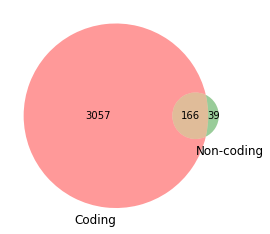

In [23]:
coding_set = set(utar_blastp.utar_id)
noncoding_set = set(infernal_results_original.utar_id)
venn2([coding_set, noncoding_set], set_labels=['Coding', 'Non-coding'])

In [71]:
utars_with_hits = noncoding_set.union(coding_set)
len(utars_with_hits)

3262

In [ ]:
3262

In [81]:
len(noncoding_set)

205

In [80]:
100 * len(noncoding_set)/utar_df.utar_id.nunique()

5.212306127637936

In [72]:
100 * len(utars_with_hits)/utar_df.utar_id.nunique()

82.93923213831681

In [82]:
utar_df.utar_id.nunique()

3933

# Merge UTAR info with blastp and noncoding results

In [30]:
infernal_results_metadata = infernal_results_original.merge(utar_df, on="utar_id")
infernal_results_metadata['hittype'] = 'Non-coding'
describe(infernal_results_metadata)

(45701, 40)
--- First 5 entries ---


,idx,target_name,target_accession,query_name,query_accession,clan_name,mdl,mdl_from,mdl_to,seq_from,...,fasta,fasta peak,peak blast result,cell type,p value,avg. logFC,% expression in cell type,% expression in other cells,p value adj.,hittype
0,1,7SK,RF00100,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,<NA>,CL00013,cm,50,128,0,...,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,1.537590e-04,0.714726,0.333,0.021,1.000000,Non-coding
1,1,7SK,RF00100,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,<NA>,CL00013,cm,50,128,0,...,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,1.537590e-04,0.714726,0.333,0.021,1.000000,Non-coding
2,1,LSU_rRNA_eukarya,RF02543,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,<NA>,CL00112,cm,1226,1316,0,...,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051,Non-coding
3,1,LSU_rRNA_eukarya,RF02543,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,<NA>,CL00112,cm,1226,1316,0,...,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051,Non-coding
4,1,LSU_rRNA_eukarya,RF02543,A00111:212:HGMF5DMXX:1:1431:18385:31673__trans...,<NA>,CL00112,cm,1230,1298,13,...,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051,Non-coding


In [53]:
infernal_renamer = {
    "target_name": "subject_title",
    "target_accession": "subject_id",
    "query_name": "read_id",
}
infernal_cols = [
    "target_name",
    "target_accession",
    "clan_name",
    "description",
    "utar_id",
    "query_name",
]

infernal_results_column_subset = infernal_results_original[infernal_cols].rename(
    columns=infernal_renamer
)
infernal_results_column_subset['hittype'] = 'Non-coding'
describe(infernal_results_column_subset)

(8859, 7)
--- First 5 entries ---


,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype
0,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding
1,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding
0,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding
1,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding
2,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:212:HGMF5DMXX:1:1431:18385:31673__trans...,Non-coding


## Subset blastp columns

In [54]:
utar_blastp.head()

,read_id,subject_id,percent_identity,e_value,bitscore,subject_title,subject_taxid,subject_species,subject_kingdom,subject_superkingdom,subject_phylum,description_with_status,additional_status,description,description_no_isoform,is_uncharacterized,utar_id
0,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001074510.1,92.9,5.200000e-07,52.0,NP_001074510.1 vacuolar protein sorting-associ...,10090.0,Mus musculus,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
1,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_037397.2,89.3,6.800000e-07,51.6,NP_037397.2 vacuolar protein sorting-associate...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
2,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001095563.1,92.9,1.500000e-06,50.4,NP_001095563.1 vacuolar protein sorting-associ...,9913.0,Bos taurus,Eukaryota,Chordata,NaN,vacuolar protein sorting-associated protein 51...,NaN,vacuolar protein sorting-associated protein 51...,vacuolar protein sorting-associated protein 51...,False,nc_033664.1__7154186-7154397
3,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_001248208.1,100.0,2.300000e-10,63.2,NP_001248208.1 RAS guanyl-releasing protein 2 ...,9544.0,Macaca mulatta,Eukaryota,Chordata,NaN,RAS guanyl-releasing protein 2,NaN,RAS guanyl-releasing protein 2,RAS guanyl-releasing protein 2,False,nc_033664.1__7154186-7154397
4,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_722541.1,100.0,2.300000e-10,63.2,NP_722541.1 RAS guanyl-releasing protein 2 iso...,9606.0,Homo sapiens,Eukaryota,Chordata,NaN,RAS guanyl-releasing protein 2 isoform a,NaN,RAS guanyl-releasing protein 2 isoform a,RAS guanyl-releasing protein 2,False,nc_033664.1__7154186-7154397


In [55]:
blastp_cols = [
    "read_id",
    "subject_id",
    "subject_title",
    "description_no_isoform",
    "utar_id",
    "subject_species",
]
blastp_renamer = {
    "description_no_isoform": "description",
    "subject_species": "clan_name",
}

blastp_results_column_subset = utar_blastp[blastp_cols].rename(columns=blastp_renamer)
blastp_results_column_subset["hittype"] = "Coding"
describe(blastp_results_column_subset)

(140872, 7)
--- First 5 entries ---


,read_id,subject_id,subject_title,description,utar_id,clan_name,hittype
0,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001074510.1,NP_001074510.1 vacuolar protein sorting-associ...,vacuolar protein sorting-associated protein 51...,nc_033664.1__7154186-7154397,Mus musculus,Coding
1,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_037397.2,NP_037397.2 vacuolar protein sorting-associate...,vacuolar protein sorting-associated protein 51...,nc_033664.1__7154186-7154397,Homo sapiens,Coding
2,A00111:61:H3FYJDMXX:1:1381:25509:8061__transla...,NP_001095563.1,NP_001095563.1 vacuolar protein sorting-associ...,vacuolar protein sorting-associated protein 51...,nc_033664.1__7154186-7154397,Bos taurus,Coding
3,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_001248208.1,NP_001248208.1 RAS guanyl-releasing protein 2 ...,RAS guanyl-releasing protein 2,nc_033664.1__7154186-7154397,Macaca mulatta,Coding
4,A00111:71:H3TTFDMXX:1:1437:18756:18975__transl...,NP_722541.1,NP_722541.1 RAS guanyl-releasing protein 2 iso...,RAS guanyl-releasing protein 2,nc_033664.1__7154186-7154397,Homo sapiens,Coding


## Concatenate DIAMOND blastp (coding) and infernal cmscan (noncoding) results

In [56]:
coding_and_noncoding_results = pd.concat([infernal_results_column_subset, blastp_results_column_subset], ignore_index=True)
describe(coding_and_noncoding_results)

(149731, 7)
--- First 5 entries ---


,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype
0,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding
1,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding
2,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding
3,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding
4,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:212:HGMF5DMXX:1:1431:18385:31673__trans...,Non-coding


In [57]:
coding_and_noncoding_results.tail()

,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype
149726,NP_001243358.1 PDZ and LIM domain protein 5 is...,NP_001243358.1,Homo sapiens,PDZ and LIM domain protein 5,nc_033662.1__102177634-102177836,A00111:192:HFVL5DMXX:1:2410:29234:24565__trans...,Coding
149727,NP_001100303.1 serine beta-lactamase-like prot...,NP_001100303.1,Rattus norvegicus,"serine beta-lactamase-like protein LACTB, mito...",nc_033662.1__102177634-102177836,A00111:192:HFVL5DMXX:1:1284:20618:1438__transl...,Coding
149728,NP_741982.1 serine beta-lactamase-like protein...,NP_741982.1,Homo sapiens,"serine beta-lactamase-like protein LACTB, mito...",nc_033662.1__102177634-102177836,A00111:192:HFVL5DMXX:1:1284:20618:1438__transl...,Coding
149729,NP_001275514.1 serine beta-lactamase-like prot...,NP_001275514.1,Homo sapiens,"serine beta-lactamase-like protein LACTB, mito...",nc_033662.1__102177634-102177836,A00111:192:HFVL5DMXX:1:1284:20618:1438__transl...,Coding
149730,NP_060190.2 signal-transducing adaptor protein...,NP_060190.2,Homo sapiens,signal-transducing adaptor protein 2,nc_033662.1__102177634-102177836,A00111:192:HFVL5DMXX:1:2459:4435:17065__transl...,Coding


## Merge with utar metadata

In [58]:
coding_and_noncoding_results_metadata = coding_and_noncoding_results.merge(utar_df, on='utar_id')
describe(coding_and_noncoding_results_metadata)

(1059818, 18)
--- First 5 entries ---


,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype,sample,uTAR,fasta,fasta_peak,peak_blast_result,cell_type,p_value,avg._logFC,%_expression_in_cell_type,%_expression_in_other_cells,p_value_adj.
0,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,0.000154,0.714726,0.333,0.021,1.0
1,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,0.000154,0.714726,0.333,0.021,1.0
2,NP_001342354.1 olfactory receptor 1F12 [Homo s...,NP_001342354.1,Homo sapiens,olfactory receptor 1F12,nc_033674.1__21901648-21901937,A00111:211:HGKCVDMXX:2:1331:20754:30796__trans...,Coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,0.000154,0.714726,0.333,0.021,1.0
3,NP_001102843.1 high mobility group box 1 like ...,NP_001102843.1,Rattus norvegicus,high mobility group box 1 like,nc_033674.1__21901648-21901937,A00111:211:HGKCVDMXX:1:1350:29080:30718__trans...,Coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,0.000154,0.714726,0.333,0.021,1.0
4,NP_001252735.1 high mobility group protein B1 ...,NP_001252735.1,Macaca mulatta,high mobility group protein B1,nc_033674.1__21901648-21901937,A00111:211:HGKCVDMXX:1:1350:29080:30718__trans...,Coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,0.000154,0.714726,0.333,0.021,1.0


In [ ]:
coding_and_noncoding_results_metadata.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/utar-predictorthologs/jan2021_utar_coding_noncoding_hits.csv",
    index=False,
)

## Filter for % coding/noncoding hits

In [74]:
coding_noncoding_hits = coding_and_noncoding_results_metadata.groupby(['cell_type', 'hittype']).utar_id.nunique().unstack().fillna(0)
coding_noncoding_hits.head()

hittype,Coding,Non-coding
cell_type,,
B cell,203.0,7.0
"CD4-positive, alpha-beta T cell",94.0,9.0
"CD8-positive, alpha-beta T cell",42.0,4.0
GABAergic neuron,18.0,3.0
M cell of gut,9.0,0.0


In [75]:
coding_noncoding_hits.sort_values("Coding", ascending=False)

hittype,Coding,Non-coding
cell_type,,
pericyte cell,510.0,25.0
basophil,260.0,12.0
plasmacytoid dendritic cell,223.0,16.0
B cell,203.0,7.0
non-myelinating Schwann cell,186.0,17.0
...,...,...
pancreatic A cell,2.0,1.0
cardiomyocyte,2.0,0.0
regular atrial cardiac myocyte,1.0,0.0


In [76]:
coding_noncoding_hits = coding_noncoding_hits.sort_values('Non-coding')
coding_noncoding_hits

hittype,Coding,Non-coding
cell_type,,
mesenchymal stem cell,6.0,0.0
slow muscle cell,6.0,0.0
regular atrial cardiac myocyte,1.0,0.0
epidermal cell,5.0,0.0
secretory cell,27.0,0.0
...,...,...
ciliated cell,155.0,13.0
plasmacytoid dendritic cell,223.0,16.0
non-myelinating Schwann cell,186.0,17.0


In [79]:
noncoding_only = coding_and_noncoding_results_metadata.groupby(['utar_id']).filter(lambda x: x.hittype.nunique() == 1 and "Non-coding" in x.hittype.unique())
noncoding_only

,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype,sample,uTAR,fasta,fasta_peak,peak_blast_result,cell_type,p_value,avg._logFC,%_expression_in_cell_type,%_expression_in_other_cells,p_value_adj.
2073,Telomerase-vert,RF00024,CL00004,Vertebrate telomerase RNA,nc_033660.1__63529726-63530242,A00111:192:HFVL5DMXX:1:2172:24325:7012__transl...,Non-coding,Antoine_Spleen_10X,NC-033660.1-63525799-63530399---185-0,NC_033660.1:63525799-63530399,NC_033660.1:63529726-63530242,"Oryctolagus cuniculus telomerase RNA gene, seq...",hematopoietic precursor cell,1.622196e-16,0.688329,0.333,0.005,4.653854e-11
2074,Telomerase-vert,RF00024,CL00004,Vertebrate telomerase RNA,nc_033660.1__63529726-63530242,A00111:192:HFVL5DMXX:1:2172:24325:7012__transl...,Non-coding,Antoine_Spleen_10X,NC-033660.1-63525799-63530399---185-0,NC_033660.1:63525799-63530399,NC_033660.1:63529726-63530242,"Oryctolagus cuniculus telomerase RNA gene, seq...",hematopoietic precursor cell,1.622196e-16,0.688329,0.333,0.005,4.653854e-11
2075,Telomerase-vert,RF00024,CL00004,Vertebrate telomerase RNA,nc_033660.1__63529726-63530242,A00111:192:HFVL5DMXX:1:2172:24325:7012__transl...,Non-coding,Antoine_Spleen_10X,NC-033660.1-63525799-63530399---185-0,NC_033660.1:63525799-63530399,NC_033660.1:63529726-63530242,"Oryctolagus cuniculus telomerase RNA gene, seq...",hematopoietic precursor cell,1.622196e-16,0.688329,0.333,0.005,4.653854e-11
2076,Telomerase-vert,RF00024,CL00004,Vertebrate telomerase RNA,nc_033660.1__63529726-63530242,A00111:192:HFVL5DMXX:1:2172:24325:7012__transl...,Non-coding,Antoine_Spleen_10X,NC-033660.1-63525799-63530399---185-0,NC_033660.1:63525799-63530399,NC_033660.1:63529726-63530242,"Oryctolagus cuniculus telomerase RNA gene, seq...",hematopoietic precursor cell,1.622196e-16,0.688329,0.333,0.005,4.653854e-11
2077,Telomerase-vert,RF00024,CL00004,Vertebrate telomerase RNA,nc_033660.1__63529726-63530242,A00111:192:HFVL5DMXX:1:2180:16523:26381__trans...,Non-coding,Antoine_Spleen_10X,NC-033660.1-63525799-63530399---185-0,NC_033660.1:63525799-63530399,NC_033660.1:63529726-63530242,"Oryctolagus cuniculus telomerase RNA gene, seq...",hematopoietic precursor cell,1.622196e-16,0.688329,0.333,0.005,4.653854e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131454,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131455,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131456,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131457,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:43:H252WDMXX:2:1236:19244:3192__transla...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17


In [83]:
noncoding_only.groupby('uTAR').description.value_counts()

uTAR                                     description                                         
NC-033660.1-61749449-61750649-+-18-0     Y RNA                                                       1
NC-033660.1-63525799-63530399---185-0    Vertebrate telomerase RNA                                  91
NC-033660.1-74131949-74133549-+-28-0     SOX2 overlapping transcript exon 2                          7
NC-033660.1-74138199-74141099-+-63-0     SOX2 overlapping transcript exon 2                         14
NC-033660.1-74148449-74152099-+-39-0     SOX2 overlapping transcript exon 2                          7
NC-033660.1-74165749-74167199-+-40-0     SOX2 overlapping transcript exon 2                          7
NC-033660.1-74170199-74172649-+-45-0     SOX2 overlapping transcript exon 2                          7
NC-033660.1-74184849-74189149-+-65-0     SOX2 overlapping transcript exon 2                          7
NC-033660.1-74191799-74193649-+-41-0     SOX2 overlapping transcript exon 2       

In [90]:
noncoding_only.query('description == "U1 spliceosomal RNA"').groupby(['cell_type', 'uTAR']).size()

cell_type                   uTAR                                 
endothelial cell of artery  NC-033671.1-17593349-17593649---107-0    108
dtype: int64

In [88]:
noncoding_only.query('description == "SOX2 overlapping transcript exon 2"')

,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype,sample,uTAR,fasta,fasta_peak,peak_blast_result,cell_type,p_value,avg._logFC,%_expression_in_cell_type,%_expression_in_other_cells,p_value_adj.
9343,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74187401-74187775,A00111:212:HGMF5DMXX:2:1206:7265:8061__transla...,Non-coding,Bernard_Brain_10X,NC-033660.1-74184849-74189149-+-65-0,NC_033660.1:74184849-74189149,NC_033660.1:74187401-74187775,undetermined,neuron,9.402159e-14,0.560776,0.294,0.021,2.780745e-08
9344,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74187401-74187775,A00111:212:HGMF5DMXX:2:1206:7265:8061__transla...,Non-coding,Bernard_Brain_10X,NC-033660.1-74184849-74189149-+-65-0,NC_033660.1:74184849-74189149,NC_033660.1:74187401-74187775,undetermined,neuron,9.402159e-14,0.560776,0.294,0.021,2.780745e-08
9345,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74187401-74187775,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74184849-74189149-+-65-0,NC_033660.1:74184849-74189149,NC_033660.1:74187401-74187775,undetermined,neuron,9.402159e-14,0.560776,0.294,0.021,2.780745e-08
9346,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74187401-74187775,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74184849-74189149-+-65-0,NC_033660.1:74184849-74189149,NC_033660.1:74187401-74187775,undetermined,neuron,9.402159e-14,0.560776,0.294,0.021,2.780745e-08
9347,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74187401-74187775,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74184849-74189149-+-65-0,NC_033660.1:74184849-74189149,NC_033660.1:74187401-74187775,undetermined,neuron,9.402159e-14,0.560776,0.294,0.021,2.780745e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131454,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131455,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131456,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:212:HGMF5DMXX:2:2106:30391:15577__trans...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17
131457,SOX2OT_exon2,RF01952,<NA>,SOX2 overlapping transcript exon 2,nc_033660.1__74165931-74166130,A00111:43:H252WDMXX:2:1236:19244:3192__transla...,Non-coding,Bernard_Brain_10X,NC-033660.1-74165749-74167199-+-40-0,NC_033660.1:74165749-74167199,NC_033660.1:74165931-74166130,Homo sapiens 3 BAC RP11-275H4 (Roswell Park Ca...,neuron,4.813795e-23,0.613687,0.412,0.024,1.423709e-17


In [91]:
noncoding_in_coding = coding_and_noncoding_results_metadata.groupby(["utar_id"]).filter(
    lambda x: x.hittype.nunique() == 2
)
noncoding_in_coding_counts = noncoding_in_coding.groupby(['uTAR', 'hittype']).description.value_counts()
noncoding_in_coding_counts

uTAR                                   hittype     description                                                               
NC-033660.1-42731449-42732999-+-104-0  Coding      D-aminoacyl-tRNA deacylase 1                                                    2
                                                   E3 ubiquitin-protein ligase RNF13 precursor                                     2
                                                   protein angel homolog 1                                                         2
                                                   E3 ubiquitin-protein ligase RNF13                                               1
                                                   PDZ and LIM domain protein 5                                                    1
                                                                                                                                ... 
NW-017968534.1-101899-118099---387-0   Coding      plakophilin-2            

In [93]:
noncoding_in_coding_counts[noncoding_in_coding_counts > 100]

uTAR                                       hittype     description                                         
NC-033661.1-104973499-104974849---109-0    Non-coding  microRNA mir-197                                         146
NC-033661.1-109615099-109619149-+-200-0    Non-coding  U1 spliceosomal RNA                                      354
NC-033661.1-114969599-114970199-+-604-0    Coding      intelectin-2 precursor                                  1276
                                                       intelectin-1 precursor                                   364
                                                       intelectin-1a precursor                                  244
                                                                                                               ... 
NC-033692.1-141856099-141857049-+-29282-0  Coding      ferritin light chain 1                                  2703
                                                       rho family-interacting ce

In [98]:
spliceosomal_rna = coding_and_noncoding_results_metadata.loc[
    coding_and_noncoding_results_metadata.description.str.contains("spliceosomal RNA")
]
spliceosomal_rna_hits = spliceosomal_rna.groupby(['cell_type', 'description',]).size()
spliceosomal_rna_hits = spliceosomal_rna_hits.reset_index()
spliceosomal_rna_hits.head()

,cell_type,description,0
0,B cell,U2 spliceosomal RNA,102
1,B cell,U6 spliceosomal RNA,12
2,"CD4-positive, alpha-beta T cell",U2 spliceosomal RNA,102
3,"CD4-positive, alpha-beta T cell",U4 spliceosomal RNA,3
4,"CD4-positive, alpha-beta T cell",U5 spliceosomal RNA,21


In [99]:
sorted(spliceosomal_rna_hits.cell_type.unique())

['B cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'T cell',
 'astrocyte',
 'basophil',
 'capillary endothelial cell',
 'ciliated cell',
 'conventional dendritic cell',
 'dendritic cell',
 'endothelial cell',
 'endothelial cell of artery',
 'endothelial cell of lymphatic vessel',
 'enterocyte of epithelium of large intestine',
 'enterocyte of epithelium of small intestine',
 'eosinophil',
 'ependymal cell',
 'epithelial cell',
 'epithelial cell of large intestine',
 'erythroid progenitor cell',
 'fibroblast',
 'fibroblast of lung',
 'glutamatergic neuron',
 'hematopoietic precursor cell',
 'innate lymphoid cell',
 'intrahepatic bile duct epithelial cell',
 'kidney loop of Henle thick ascending limb epithelial cell',
 'kidney proximal convoluted tubule epithelial cell',
 'lymphocyte',
 'macrophage',
 'mature NK T cell',
 'myeloid cell',
 'natural killer cell',
 'neuron',
 'neutrophil',
 'non-myelinating Schwann cell',
 'pericyte cell',
 'plasma cell',
 '

In [ ]:
spliceosomal_rna_hits.reset_index()

In [101]:
sorted(coding_and_noncoding_results_metadata['sample'].unique())

['Antoine_Bladder_10X',
 'Antoine_Blood_10X',
 'Antoine_Bone_10X',
 'Antoine_Bone_marrow_10X',
 'Antoine_Brain_cortex_10X',
 'Antoine_Brainstem_10X',
 'Antoine_Colon_10X',
 'Antoine_Eye_retina_10X',
 'Antoine_Fat_10X',
 'Antoine_Heart_10X',
 'Antoine_Hypothalamus_Pituitary_10X',
 'Antoine_Kidney_10X',
 'Antoine_Liver_10X',
 'Antoine_Lung_CD31_10X',
 'Antoine_Lung_EPCAM_10X',
 'Antoine_Lung_P3_10X',
 'Antoine_Pancreas_10X',
 'Antoine_Skin_10X',
 'Antoine_Small_intestine_10X',
 'Antoine_Spleen_10X',
 'Antoine_Testes_10X',
 'Antoine_Tongue_10X',
 'Antoine_Trachea_10X',
 'Bernard_Blood_10X',
 'Bernard_Brain_10X',
 'Bernard_Lung_10X',
 'Martine_Blood_10X',
 'Martine_Bone_marrow_10X',
 'Martine_Heart_10X',
 'Martine_Kidney_1_10X',
 'Martine_Kidney_2_10X',
 'Martine_Liver_10X',
 'Martine_Lung_10X',
 'Martine_Mammary_gland_10X',
 'Martine_Spleen_10X',
 'Martine_Trachea_10X',
 'Martine_Uterus_10X',
 'Stumpy_Aorta_10X',
 'Stumpy_Bladder_10X',
 'Stumpy_Blood_10X',
 'Stumpy_Bone_1_10X',
 'Stumpy_B

In [106]:
coding_and_noncoding_results_metadata.query(
    'sample == "Stumpy_Limb_muscle_10X"'
).groupby(["cell_type", "uTAR", 'hittype']).apply(lambda x: x.description.value_counts().head(2))

cell_type              uTAR                                     hittype                                                              
B cell                 NC-033663.1-30354599-30360049---223-0    Coding   plakophilin-2                                                    5
                                                                         protein angel homolog 1                                          4
                       NC-033663.1-30362149-30367399---340-0    Coding   plakophilin-2                                                    5
                                                                         protein angel homolog 1                                          4
                       NC-033665.1-842549-843149-+-576-0        Coding   serine/threonine-protein phosphatase 1 regulatory subunit 10     3
                                                                                                                                         ..
vein endothelial cell  NC-

In [139]:
noncoding.loc[
    noncoding.cell_type.str.contains(
        "muscle|mesenchymal"
    )
].groupby(["sample", 'cell_type']).apply(lambda x: x.description.value_counts().head(3))

sample                      cell_type                                                                                        
Antoine_Bladder_10X         vascular associated smooth muscle cell  Nuclear enriched abundant transcript 1 conserved region 3      3
Antoine_Bone_10X            vascular associated smooth muscle cell  U2 spliceosomal RNA                                          102
Antoine_Lung_CD31_10X       smooth muscle cell                      Y RNA                                                          2
Antoine_Pancreas_10X        vascular associated smooth muscle cell  Y RNA                                                          2
Antoine_Tongue_10X          skeletal muscle satellite stem cell     Nuclear enriched abundant transcript 1 conserved region 3      3
                            vascular associated smooth muscle cell  Nuclear enriched abundant transcript 1 conserved region 3      3
Martine_Lung_10X            smooth muscle cell                      7SK RNA 

In [107]:
noncoding = coding_and_noncoding_results_metadata.query('hittype == "Non-coding"')
describe(noncoding)

(45701, 18)
--- First 5 entries ---


,subject_title,subject_id,clan_name,description,utar_id,read_id,hittype,sample,uTAR,fasta,fasta_peak,peak_blast_result,cell_type,p_value,avg._logFC,%_expression_in_cell_type,%_expression_in_other_cells,p_value_adj.
0,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,1.537590e-04,0.714726,0.333,0.021,1.000000
1,7SK,RF00100,CL00013,7SK RNA,nc_033674.1__21901648-21901937,A00111:61:H3FYJDMXX:1:1321:28113:5306__transla...,Non-coding,Stumpy_Fat_SCAT_10X,NC-033674.1-21901049-21903949-+-464-0,NC_033674.1:21901049-21903949,NC_033674.1:21901648-21901937,Human DNA sequence from clone RP1-97J1 on chro...,pericyte cell,1.537590e-04,0.714726,0.333,0.021,1.000000
33,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding,Antoine_Bone_10X,NC-033677.1-17134449-17135999-+-125-0,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051
34,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:192:HFVL5DMXX:1:2336:12228:32033__trans...,Non-coding,Antoine_Bone_10X,NC-033677.1-17134449-17135999-+-125-0,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051
35,LSU_rRNA_eukarya,RF02543,CL00112,Eukaryotic large subunit ribosomal RNA,nc_033677.1__17135165-17135306,A00111:212:HGMF5DMXX:1:1431:18385:31673__trans...,Non-coding,Antoine_Bone_10X,NC-033677.1-17134449-17135999-+-125-0,NC_033677.1:17134449-17135999,NC_033677.1:17135165-17135306,undetermined,tendon cell,1.771869e-10,0.689466,0.333,0.008,0.000051


In [112]:
noncoding.query(
    'sample == "Stumpy_Limb_muscle_10X"'
).groupby(["cell_type", "uTAR", 'hittype']).apply(lambda x: x.subject_title.value_counts().head(2))

cell_type                   uTAR                                       hittype                
basophil                    NC-033664.1-6532199-6546199---2602278-0    Non-coding  NEAT1_3         3
endothelial cell of artery  NC-033666.1-82636849-82638599-+-114-0      Non-coding  U6              2
                            NC-033692.1-108340049-108342799-+-365-0    Non-coding  Metazoa_SRP     3
fast muscle cell            NC-033662.1-96736949-96737849-+-50728-0    Non-coding  mir-147         7
fat cell                    NC-033662.1-96736949-96737849-+-50728-0    Non-coding  mir-147         7
macrophage                  NC-033692.1-141856099-141857049-+-29282-0  Non-coding  mir-692        86
mature NK T cell            NC-033681.1-13541449-13551699---3215-0     Non-coding  U6              2
neutrophil                  NC-033662.1-96736949-96737849-+-50728-0    Non-coding  mir-147         7
                            NC-033681.1-16376149-16381299-+-109712-0   Non-coding  mir-769       

In [113]:
noncoding.query('cell_type == "pericyte cell"').subject_title.value_counts()


DLEU2_5         69
NEAT1_3         45
Y_RNA           29
U3              29
5S_rRNA         19
7SK             17
U6              11
snoU13          11
DLEU2_3          6
IRES_Bag1        6
SNORA11          4
SOX2OT_exon2     4
SOX2OT_exon4     4
SNORA42          2
Name: subject_title, dtype: int64

In [ ]:
noncoding.query('')

In [132]:
noncoding_top_per_celltype = (
    noncoding.groupby(["subject_title", "description"])
    .apply(lambda x: x.groupby(['cell_type', 'sample']).size().sort_values(ascending=False).head(3))
    .reset_index()
)
noncoding_top_per_celltype = noncoding_top_per_celltype.rename(
    columns={"level_2": "cell_type", 0: "n_reads"}
)
noncoding_top_per_celltype = noncoding_top_per_celltype.set_index(['subject_title', 'description', 'cell_type', 'sample'])
noncoding_top_per_celltype

n_reads
subject_title          description                                        cell_type                                       sample                                     
5S_rRNA                <NA>                                               pericyte cell                                   Stumpy_Fat_SCAT_10X                      19
                                                                          kidney proximal straight tubule epithelial cell Antoine_Kidney_10X                       15
                                                                          ciliated cell                                   Stumpy_Trachea_10X                       15
7SK                    7SK RNA                                            ciliated cell                                   Stumpy_Trachea_10X                      100
                                                                          kidney proximal straight tubule epithelial cell Martine_Kidney_2_10X                     98
                                                                          endothelial cell of hepatic sinusoid            Martine_Liver_10X                        98
DLEU2_3                Deleted in lymphocytic leukemia 2 conserved reg... stromal cell                                    Antoine_Kidney_10X                        6
                                                                          pericyte cell                                   Stumpy_Diaphragm_10X                      6
                                                                          monocyte                                        Martine_Kidney_1_10X                      6
DLEU2_5                Deleted in lymphocytic leukemia 2 conserved reg... monocyte                                        Martine_Liver_10X                       102
                                                                                                                          Martine_Kidney_2_10X                    102
                                                                                                                          Martine_Kidney_1_10X                    102
GP_knot1               Gag/pol translational readthrough site             ciliated cell                                   Stumpy_Trachea_10X                       58
                                                                          mesothelial cell                                Martine_Blood_10X                         3
Histone3               Histone 3' UTR stem-loop                           non-myelinating Schwann cell                    Stumpy_Kidney_10X                         2
                                                                          myeloid cell                                    Stumpy_Colon_10X                          2
                                                                          club cell                                       Bernard_Lung_10X                          2
IRES_Bag1              Bag-1 internal ribosome entry site (IRES)          pericyte cell                                   Martine_Lung_10X                          6
                                                                          capillary endothelial cell                      Antoine_Bone_10X                          6
IRES_FGF1              FGF-1 internal ribosome entry site (IRES)          plasmacytoid dendritic cell                     Antoine_Bladder_10X                       5
LSU_rRNA_archaea       Archaeal large subunit ribosomal RNA               tendon cell                                     Antoine_Bone_10X                          2
                                                                          vascular associated smooth muscle cell          Martine_Mammary_gland_10X                 1
                                                                          unlabeled                                       Stumpy_Pancreas_10X                       1
LSU_rRNA

In [134]:
noncoding_top_per_celltype.to_csv(
    "/home/olga/googledrive/TabulaMicrocebus/analysis/utar-predictorthologs/jan2021_utar_noncoding_rna_hit_summary.csv",
    index=True,
)